### Guardador de dados
Série de scripts para processar as imagens em *jpg* que saem do *coletor_de_dados.py* e armazená-las, assim como os labels, em arquivos binários, para posteriormente treinar a máquina. \
Obs.: Cada conjunto de imagens que serão processadas a cada iteração terão o mesmo label, definido na variável *data_labels*

In [29]:
# Definição de variáveis

# MUDAR ESTAS
data_to_append = 77    # Quantidade de imagens
data_labels = 0        # Label das imagens

data_path = "../data/data.npy"
labels_path = "../data/labels.npy"
data_dir = "../data/"


In [30]:
# Carrega as fotos já existentes

import numpy as np

try: 
    old_data = np.load(data_path)
    old_labels = np.load(labels_path)
    print("Files loaded sucessfuly.")
except FileNotFoundError:
    print("Files not found. Starting from blank...")
    old_data = np.array([])
    old_labels = np.array([])


print("Data loaded: ", old_data.shape)


Files loaded sucessfuly.
Data loaded:  (838, 50, 50)


Loading image from ../data/data001.jpg
Loading image from ../data/data002.jpg
Loading image from ../data/data003.jpg
Loading image from ../data/data004.jpg
Loading image from ../data/data005.jpg
Loading image from ../data/data006.jpg
Loading image from ../data/data007.jpg
Loading image from ../data/data008.jpg
Loading image from ../data/data009.jpg
Loading image from ../data/data010.jpg
Loading image from ../data/data011.jpg
Loading image from ../data/data012.jpg
Loading image from ../data/data013.jpg
Loading image from ../data/data014.jpg
Loading image from ../data/data015.jpg
Loading image from ../data/data016.jpg
Loading image from ../data/data017.jpg
Loading image from ../data/data018.jpg
Loading image from ../data/data019.jpg
Loading image from ../data/data020.jpg
Loading image from ../data/data021.jpg
Loading image from ../data/data022.jpg
Loading image from ../data/data023.jpg
Loading image from ../data/data024.jpg
Loading image from ../data/data025.jpg
Loading image from ../dat

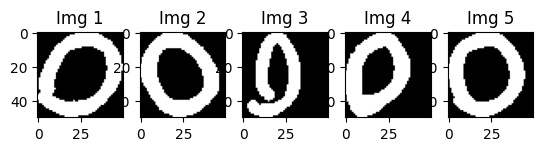

In [31]:
# Carrega as fotos novas dos JPGs
import cv2
import matplotlib.pyplot as plt
from utility import modify_images

new_data = np.array([])
for i in range(data_to_append):
    path = data_dir + f"data{i+1:03}.jpg"
    print("Loading image from", path)
    data = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # Vamos mudar a imagem a fim de manter apenas o necessário
    # utilizando a função modify_images
    data = modify_images(data)

    data = data.reshape((1, *data.shape))
    if not i:
        # O primeiro elemento define o 'shape' do array
        new_data = data
    else:
        # E os outros são adicionados no fim
        new_data = np.append(new_data, data, axis=0)

# mostra algumas imagens
fig, ax = plt.subplots(1, min(5, len(new_data)))
if len(new_data) > 1:
    for i, axes in enumerate(ax):
        axes.imshow(new_data[i], cmap='gray')
        axes.set_title(f"Img {i+1}")
else:
    ax.imshow(new_data[i], cmap='gray')
    ax.set_title(f"Img {i}")

print(new_data.shape)

# Cria o vetor de novos labels
new_labels = np.full(len(new_data), data_labels)


In [32]:
# Junta os dados

if len(old_data): # junta apenas se tiver dados antigos
    new_data = np.append(old_data, new_data, axis=0)
    new_labels = np.append(old_labels, new_labels, axis=0)


print("data size:", new_data.shape)
print("labels size:", new_labels.shape)



data size: (915, 50, 50)
labels size: (915,)


In [33]:
# Finalização
# Coloca os novos dados no arquivo
np.save(data_path, new_data)
np.save(labels_path, new_labels)


In [34]:
# Apaga as fotos
import os

for i in range(data_to_append):
    path = data_dir + f"data{i+1:03}.jpg"
    os.remove(path)
